<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/pycaretclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret pandas shap

     |████████████████████████████████| 266 kB 5.3 MB/s 
     |████████████████████████████████| 371 kB 10.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 261 kB 56.0 MB/s 
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 1.7 MB 74.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 58.6 MB/s 
     |████████████████████████████████| 271 kB 71.7 MB/s 
     |████████████████████████████████| 6.8 MB 41.8 MB/s 
     |████████████████████████████████| 1.3 MB 66.8 MB/s 
     |████████████████████████████████| 2.0 MB 59.3 MB/s 
     |█████████

In [2]:
 import pandas as pd

In [3]:
from pycaret.classification import * 

In [4]:
df = pd.read_csv('/content/sample_data/heart.csv') 

In [5]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal'] 

In [10]:
experiment = setup(df, target='target', categorical_features=cat_features)  

,Description,Value
0,session_id,3749
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8671,0.0000,0.9227,0.8605,0.8865,0.7267,0.7390,0.013
lda,Linear Discriminant Analysis,0.8671,0.9145,0.9227,0.8605,0.8865,0.7267,0.7390,0.016
lr,Logistic Regression,0.8483,0.9118,0.8886,0.8578,0.8659,0.6907,0.7079,0.492
et,Extra Trees Classifier,0.8294,0.8982,0.8697,0.8390,0.8483,0.6518,0.6643,0.462
lightgbm,Light Gradient Boosting Machine,0.8160,0.8765,0.8780,0.8127,0.8370,0.6228,0.6428,0.063
ada,Ada Boost Classifier,0.8158,0.8110,0.8455,0.8294,0.8337,0.6269,0.6340,0.095
rf,Random Forest Classifier,0.7965,0.8979,0.8606,0.7927,0.8224,0.5828,0.5937,0.462
gbc,Gradient Boosting Classifier,0.7686,0.8457,0.8280,0.7751,0.7966,0.5274,0.5368,0.083
nb,Naive Bayes,0.7680,0.8596,0.6970,0.8507,0.7535,0.5408,0.5598,0.015
dt,Decision Tree Classifier,0.6922,0.6838,0.7576,0.7112,0.7308,0.3697,0.3752,0.015


In [13]:
predict_model(best_model, df.tail()) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Label
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1


In [14]:
save_model(best_model, model_name='ridge-model') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex', 'cp', 'fbs',
                                                             'restecg', 'exang',
                                                             'thal'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=Non...
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
               

In [15]:
model = load_model('ridge-model') 

Transformation Pipeline and Model Successfully Loaded


In [16]:
model.predict(df.tail()) 

array([0, 1, 0, 0, 1])

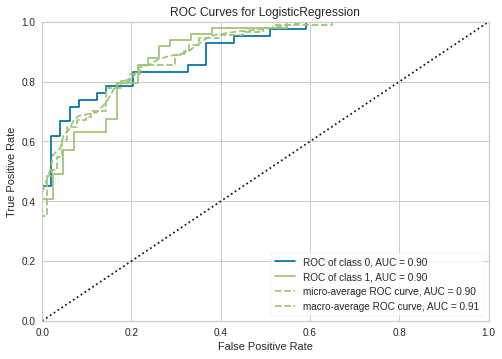

In [19]:

lr = create_model('lr')
plot_model(lr)


In [21]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5455,0.6625,0.5833,0.5833,0.5833,0.0833,0.0833
1,0.5909,0.5917,0.7500,0.6000,0.6667,0.1538,0.1604
2,0.7143,0.8009,0.7500,0.7500,0.7500,0.4167,0.4167
3,0.5238,0.6250,0.4167,0.6250,0.5000,0.0789,0.0849
4,0.8095,0.8333,1.0000,0.7500,0.8571,0.5882,0.6455
5,0.7143,0.8056,0.9167,0.6875,0.7857,0.3824,0.4196
6,0.7143,0.7636,0.7273,0.7273,0.7273,0.4273,0.4273
7,0.5714,0.5591,0.6364,0.5833,0.6087,0.1370,0.1376
8,0.6667,0.6545,0.7273,0.6667,0.6957,0.3288,0.3303
9,0.7619,0.8227,0.8182,0.7500,0.7826,0.5205,0.5230


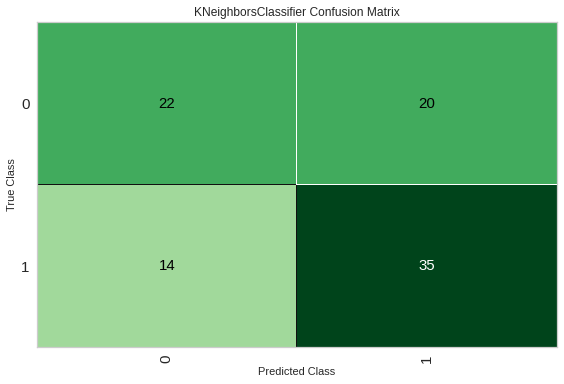

In [22]:
plot_model(knn, plot = 'confusion_matrix') 

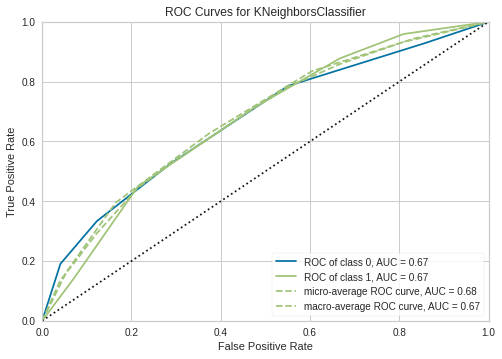

In [23]:
plot_model(knn)